# Pandas Extension - Wind Power By Country

In this notebook, we will grab a table from wikipedia and store the data in a `pandas` dataframe.

We will then use the dataframe data to create some more information, make some projections and plot some graphs. The last part includes using the `Matplotlib` library which we will look at in detail later in the course. 

Run the code in the code cells in order. There are 4 tasks (highlighted in green) for you to do.

## Grab Some Data from the Web
The next few code cells grab some data from the web (Wikipedia) and stores the contents of a particular table we want to analyze in a pandas dataframe.

In [1]:
# Import the requests library for making http requests.
import requests as r

# Create a header that says the request is coming form a browser-like agent (this is to prevent the website blocking our request).
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36',
}

# Make an http request to get the webpage with the following url.
url = "https://en.wikipedia.org/wiki/Solar_power_by_country"
page = r.get(url, headers = headers)

# Check that the request was successful. If so, the status code should be 200.
page.status_code

200

In [2]:
# Print the first few hundred characters of the webpage..
# The actual content of the page, which is HTML, is stored in the 'content' attribute of the page object.
print(page.content[0:200])

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pin'


In [3]:
# Import the pandas and numpy libraries.
import pandas as pd, numpy as np

# Use pd.read_html() to find all the tables in the webpage and put them in a list.
tables = pd.read_html(page.content)

# There should be 13 tables in this web page. We want the fifth one (index == 4).
# We will store a copy of this table in a dataframe called wp (for wind power).
sp = tables[0].copy()
sp

,Country,Gen. (TWh),% gen.,Cap. (GW),% cap. growth,Cap. fac.,Cap. per capita (W)
0,World,2130.64,6.9,1865.49,31.2,13%,231
1,China,834.10,8.3,887.93,45.6,11%,627
2,United States,303.17,6.9,177.47,27.5,19%,519
3,India,133.81,6.5,97.38,33.7,16%,69
4,Japan,102.02,10.0,91.61,2.8,13%,744
...,...,...,...,...,...,...,...
100,Zambia (2023),0.15,0.8,0.13,30.0,13%,5
101,Sudan (2023),0.14,0.8,0.19,0.0,8%,4
102,Myanmar,0.13,0.5,0.22,22.2,7%,4
103,Togo (2023),0.11,12.0,0.07,0.0,18%,8


In [4]:
# Sort the rows on the "Gen (TWh)" column from largest to smallest.
sp.sort_values('Gen. (TWh)', ascending=False, inplace=True)
sp

,Country,Gen. (TWh),% gen.,Cap. (GW),% cap. growth,Cap. fac.,Cap. per capita (W)
0,World,2130.64,6.9,1865.49,31.2,13%,231
1,China,834.10,8.3,887.93,45.6,11%,627
2,United States,303.17,6.9,177.47,27.5,19%,519
3,India,133.81,6.5,97.38,33.7,16%,69
4,Japan,102.02,10.0,91.61,2.8,13%,744
...,...,...,...,...,...,...,...
100,Zambia (2023),0.15,0.8,0.13,30.0,13%,5
101,Sudan (2023),0.14,0.8,0.19,0.0,8%,4
102,Myanmar,0.13,0.5,0.22,22.2,7%,4
103,Togo (2023),0.11,12.0,0.07,0.0,18%,8


In [5]:
# Delete the first row which is totals for the whole world.
sp.drop(0, inplace=True)

# Note: when we do the above, we can also reset the index to start at 0 and be consecutive integers. This makes future operations easier.
sp.reset_index(drop=True, inplace=True)

# drop the last column which we won't use.
sp.drop(columns = ['Cap. fac.', 'Cap. per capita (W)'], inplace=True)
sp

,Country,Gen. (TWh),% gen.,Cap. (GW),% cap. growth
0,China,834.10,8.3,887.93,45.6
1,United States,303.17,6.9,177.47,27.5
2,India,133.81,6.5,97.38,33.7
3,Japan,102.02,10.0,91.61,2.8
4,Brazil,74.68,10.0,53.11,40.0
...,...,...,...,...,...
99,Zambia (2023),0.15,0.8,0.13,30.0
100,Sudan (2023),0.14,0.8,0.19,0.0
101,Myanmar,0.13,0.5,0.22,22.2
102,Togo (2023),0.11,12.0,0.07,0.0


['China', 'United States', 'India', 'Japan', 'Brazil', 'Germany', 'Spain', 'Australia', 'Italy', 'South Korea', 'Rest of World']
[834.1, 303.17, 133.81, 102.02, 74.68, 70.99, 58.6, 49.84, 35.81, 32.73, np.float64(413.13)]


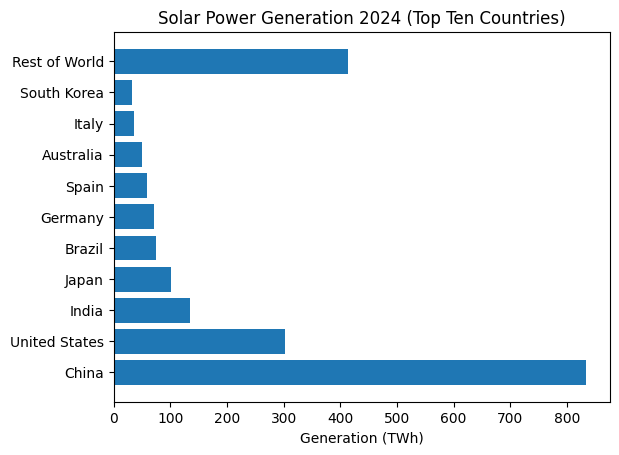

In [18]:
# Import the relevant plotting library.
import matplotlib.pyplot as plt

# Create a bar graph showing generation for the top ten countries.
x = sp['Country'][0:10].tolist()
y = sp['Gen. (TWh)'][0:10].tolist()
rest_sum = sp[sp['Gen. (TWh)']<30]['Gen. (TWh)'].sum()
x.append('Rest of World')
y.append(rest_sum)
x = x[::-1]
y = y[::-1]
plt.barh(x, y)
plt.title("Solar Power Generation 2024 (Top Ten Countries)")
plt.xlabel("Generation (TWh)")
plt.show()

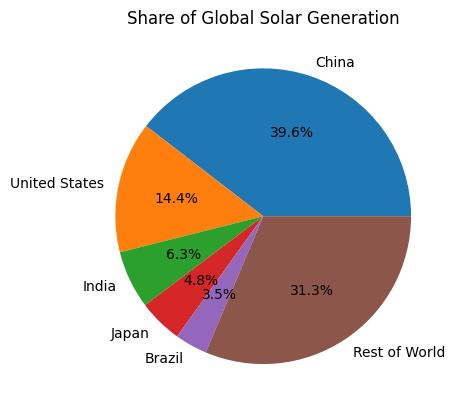

In [20]:
# Create a pie chart showing share of global generation for 2024.
n = 5
cutoff = sp.loc[n-1, 'Gen. (TWh)']
x = sp['Country'][0:n].tolist()
y = sp['Gen. (TWh)'][0:n].tolist()
rest_sum = sp[sp['Gen. (TWh)']<cutoff]['Gen. (TWh)'].sum()
x.append('Rest of World')
y.append(rest_sum)
plt.title("Share of Global Solar Generation")
plt.pie(y, labels=x, autopct='%1.1f%%')
plt.show()

In [21]:
print(x)
print(y)

['China', 'United States', 'India', 'Japan', 'Brazil', 'Rest of World']
[834.1, 303.17, 133.81, 102.02, 74.68, np.float64(661.1)]
